Breast Cancer: Classification Model 

Dataset reference: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [40]:
# Import Python modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning modules

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

# Filter methods

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from functools import partial


In [41]:
# Import the dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [42]:
x.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [44]:
# Transform 'Diagnosis' into a binary variable.
y['Diagnosis'] = np.where(y['Diagnosis'] == 'M', 1, 0)


C:\Users\BRUNAL~1\AppData\Local\Temp/ipykernel_22480/1349956466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = np.where(y['Diagnosis'] == 'M', 1, 0)


#### Splitting the Data

Next, the data needs to be divided into training and validation sets. In this split, 20% of the data is reserved for final validation, while 80% is allocated for training the model.

In [45]:
# Splitting the data

#Validation chunk size
val_size = 0.20

#Split the data into chunks
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=val_size, random_state = 0)

#### Prediction

- **Model Building:** 
  - For this project, four algorithms will be used to make predictions:
  1. Logistic Regression
  2. K Nearest Neighbor
  3. Decision Trees
  4. Random Forests

##### Evaluation Metrics

- **Accuracy:** is the correct values divided by total values. (TP + TN)/(TP + FP + TN + FN).
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values. TP/(TP + FP).
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses. TP/(TP + FN).
- **F1-score:** weighted average of precision and recall. 2*((Precision*Recall)/(Precision+Recall)).
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict.

Legend: T = true, F = false, P = positive, N = negative.

 1. Logistic Regression

In [48]:
class LRModel:
    def __init__(self):
        self.lr_model = LogisticRegression(max_iter=10000)

    def train(self, x_train, y_train):
        self.lr_model.fit(x_train, y_train)

    def predict(self, x_test):
        return self.lr_model.predict(x_test)

    def predict_proba(self, x_test):
        return self.lr_model.predict_proba(x_test)

    def coefficients(self):
        print(self.lr_model.coef_)
        print(self.lr_model.intercept_)

    def classification_report(self, y_test, y_pred):
        print(classification_report(y_test, y_pred))

    def confusion_matrix(self, y_test, y_pred):
        conf_matrix = pd.DataFrame(
            confusion_matrix(y_test, y_pred), 
            index=['actual no', 'actual yes'], 
            columns=['predicted no', 'predicted yes']
        )
        print(conf_matrix)

    def plot_roc_curve(self, x_train, y_train, x_test, y_test):
        y_pred_prob = self.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve')

        clf = DummyClassifier(strategy='most_frequent', random_state=0)
        clf.fit(x_train, y_train)
        roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
        fpr_dummy, tpr_dummy, _ = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
        plt.plot(fpr_dummy, tpr_dummy, color='navy', linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid()
        plt.legend(loc="lower right")
        plt.show()

        roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
        print(roc_auc)

c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

            predicted no  predicted yes
actual no             62              5
actual yes             1             46


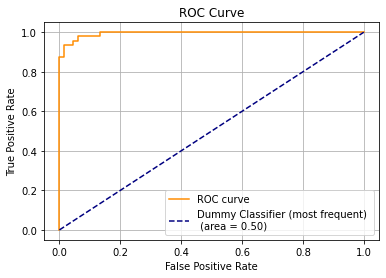

0.9939663385201651


In [51]:
# Create an instance of LRModel
lr_model = LRModel()

# Train the logistic regression model
lr_model.train(x_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(x_test)

# Print the classification report
lr_model.classification_report(y_test, y_pred)

# Print the confusion matrix
lr_model.confusion_matrix(y_test, y_pred)

# Plot the ROC curve and print the ROC AUC score
lr_model.plot_roc_curve(x_train, y_train, x_test, y_test)

2. K Nearest Neighbor

In [52]:
class KNNModel:
    def __init__(self):
        self.knn_model = KNeighborsClassifier(n_neighbors = 5)

    def train(self, x_train, y_train):
        self.knn_model.fit(x_train, y_train)

    def predict(self, x_test):
        return self.knn_model.predict(x_test)

    def predict_proba(self, x_test):
        return self.knn_model.predict_proba(x_test)

    def classification_report(self, y_test, y_pred):
        print(classification_report(y_test, y_pred))

In [53]:
# Create an instance of KNNModel
knn_model = KNNModel()

# Train the logistic regression model
knn_model.train(x_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(x_test)

# Print the classification report
knn_model.classification_report(y_test, y_pred)

c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

